<h1 style='text-align: center;'>DENGUE DATA ANALYSIS IN THE PHILIPPINES 2016-2020</h1>
<br>
<h2 style='text-align: center;'>JAY CEE I. MACARAIG</h2>
<h3 style='text-align: center;'>BSIT - 3B</h3>
<hr>

<h2>IMPORTING IMPORTANT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\dengue.csv')

In [3]:
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<hr><br>
<h2>CLEANING DATA TYPES AND FILLING UP NULL VALUES</h2>

In [4]:
data.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [5]:
data.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
data['Month'] = data['Month'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Year'] = data['Year'].astype('category')
data.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
regions_to_island = {
    # LUZON ISLAND GROUP
    'NCR': 'Luzon',
    'CAR': 'Luzon',
    'Region I': 'Luzon',
    'Region II': 'Luzon',
    'Region III': 'Luzon',
    'Region IV-A': 'Luzon',
    'Region IV-B': 'Luzon',
    'Region V': 'Luzon',

    # VISAYAS ISLAND GROUP
    'Region VI': 'Visayas',
    'Region VII': 'Visayas',
    'Region VIII': 'Visayas',

    # MINDANAO ISLAND GROUP
    'Region IX': 'Mindanao',
    'Region X': 'Mindanao',
    'Region XI': 'Mindanao',
    'Region XII': 'Mindanao',
    'Region XIII': 'Mindanao',
    'BARMM': 'Mindanao',
}

months_to_seasons = {
    "January": "Cool Dry Season",
    "February": "Cool Dry Season",
    "March": "Summer (Hot Dry Season)",
    "April": "Summer (Hot Dry Season)",
    "May": "Summer (Hot Dry Season)",
    "June": "Rainy Season",
    "July": "Rainy Season",
    "August": "Rainy Season",
    "September": "Rainy Season",
    "October": "Rainy Season",
    "November": "Rainy Season",
    "December": "Cool Dry Season"
}

In [91]:
data['Island'] = data['Region'].map(regions_to_island)
data['Season'] = data['Month'].map(months_to_seasons)
data['Mortality Rate'] = np.round((data['Dengue_Deaths'] / data['Dengue_Cases']) * 100,2)
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island,Season,Mortality Rate
0,January,2016,Region I,705,1,Luzon,Cool Dry Season,0.14
1,February,2016,Region I,374,0,Luzon,Cool Dry Season,0.00
2,March,2016,Region I,276,0,Luzon,Summer (Hot Dry Season),0.00
3,April,2016,Region I,240,2,Luzon,Summer (Hot Dry Season),0.83
4,May,2016,Region I,243,1,Luzon,Summer (Hot Dry Season),0.41
...,...,...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,Mindanao,Rainy Season,0.00
1016,September,2020,BARMM,16,8,Mindanao,Rainy Season,50.00
1017,October,2020,BARMM,13,9,Mindanao,Rainy Season,69.23
1018,November,2020,BARMM,15,1,Mindanao,Rainy Season,6.67


<br>
<h2 style='text-align: center;'>DENGUE<br>DATA EXPLORATORY ANALYSIS</h2>
<hr>

<br>
<br>
<h2>ANALYSIS 1: TOTAL DENGUE CASES & DEATH BY YEAR</h2>
<hr>

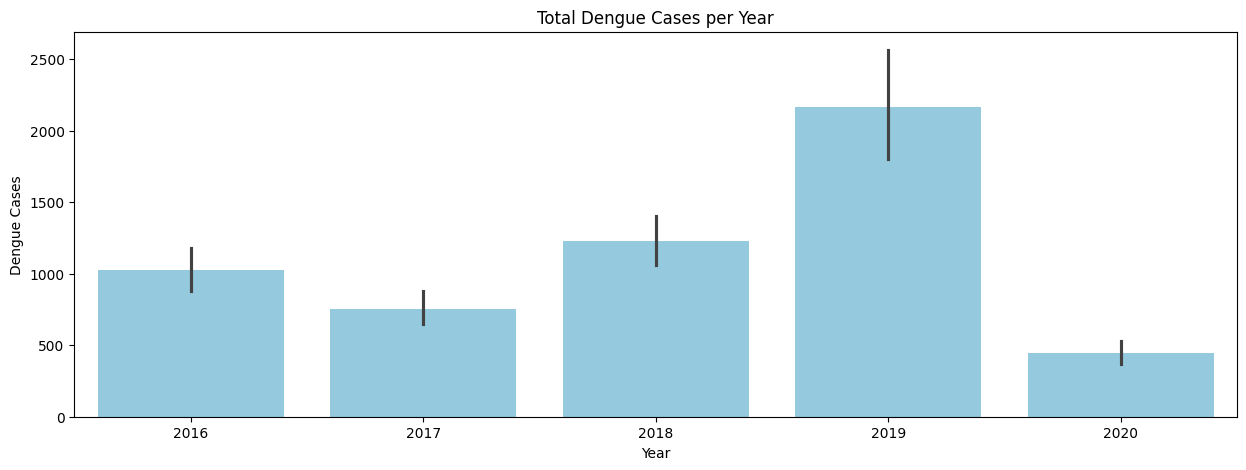

In [99]:
visual1 = sns.barplot(data=data, x='Year', y="Dengue_Cases", color="skyblue")
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.gcf().set_size_inches(15,5)
plt.show()


<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 1 : </span>The chart shows Total Dengue Cases per Year (2016–2020), with cases peaking sharply in 2019 (~2,200) — more than double 2018 and over 5x higher than 2020. Yet, 2019 ranks only 2nd to last in Dengue Deaths (~9). With 2020 as the year with the lowest Dengue Cases (~400) and also has the lowest Dengue Deaths (~5).</h4>
<br>

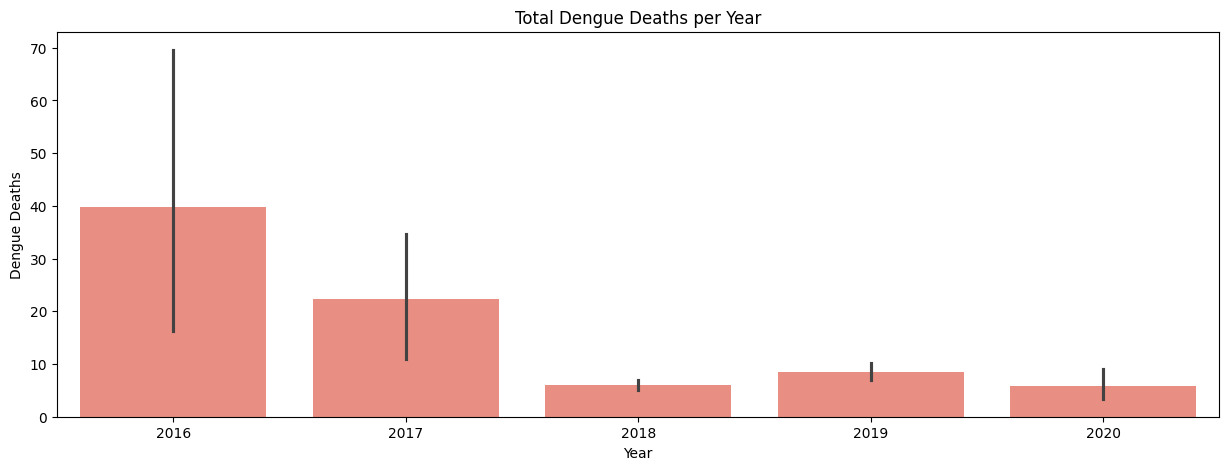

In [104]:
visual2 = sns.barplot(data=data, x='Year', y="Dengue_Deaths", color="salmon")
plt.title('Total Dengue Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.gcf().set_size_inches(15,5)
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 2 : </span>The chart shows Total Dengue Deaths per Year (2016–2020). The chart shows that 2016 had the highest Dengue Deaths (~40) despite having only ~1,000 Dengue Cases. 2017 follows with ~25 Dengue Deaths aand 2018 being the lowest in the ranking. This pattern shows significant improvement when it comes to preventing and treating Dengue in the Philippines. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 2: MONTHLY TREND OF DENGUE CASES (ALL YEARS)</h2>
<hr>

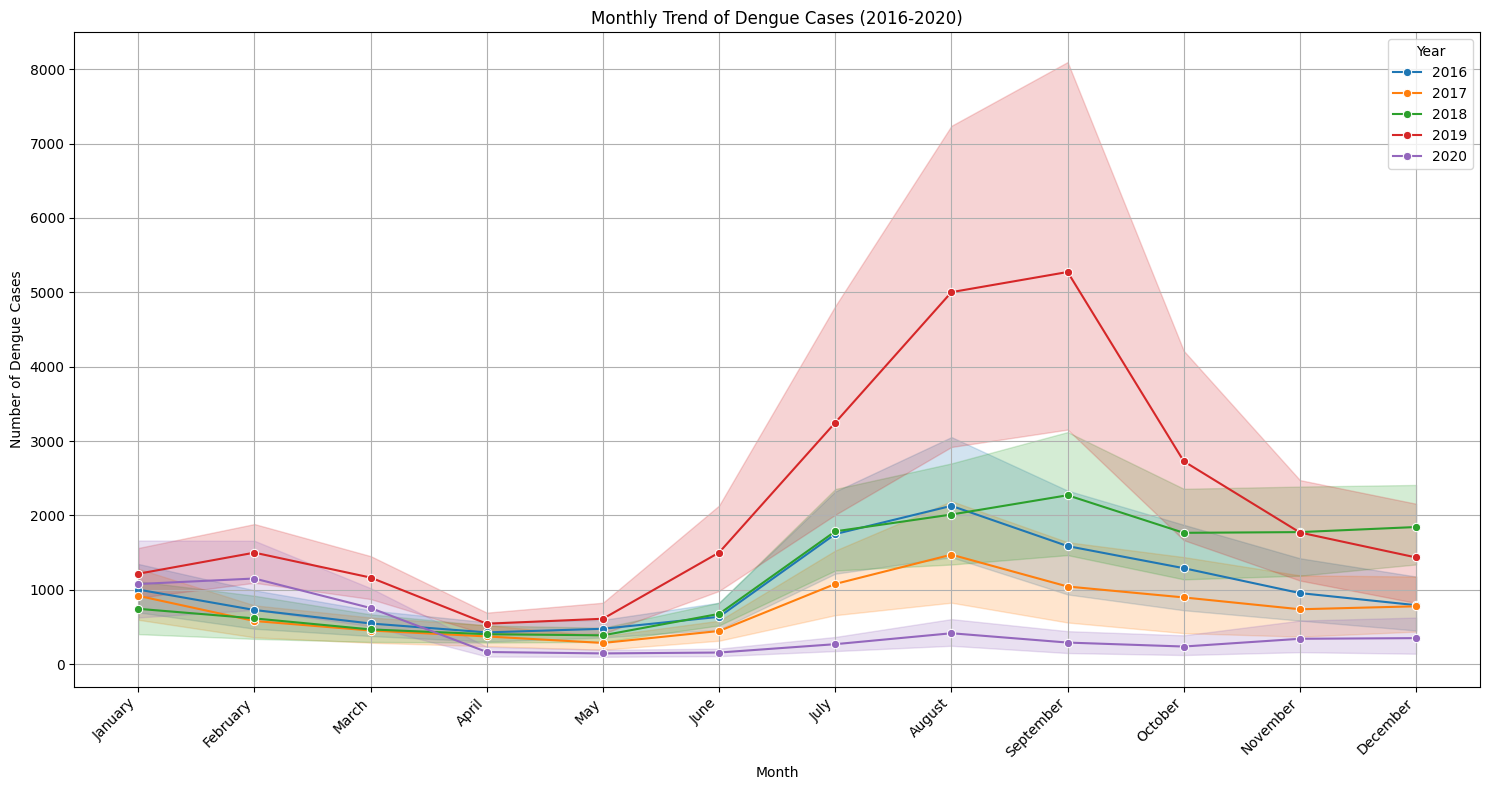

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)


sns.lineplot( data=data, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(15, 8)
plt.title('Monthly Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 3 : </span>The chart shows the Monthly Trend of Dengue Cases (2016–2020), revealing a consistent seasonal pattern. As shown in the chart, Dengue Cases declines from January-April and are stagnant for a Month before continuing to rise from June to December. The Year with the highest Dengue Cases are in 2019. With over 5,000 cases in September alone, far exceeding all other years. In contrast, 2020 had the lowest monthly totals across all months, likely due to the post-pandemic preparations and measurements.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 3: SEASONAL TREND OF DENGUE CASES</h2>
<hr>

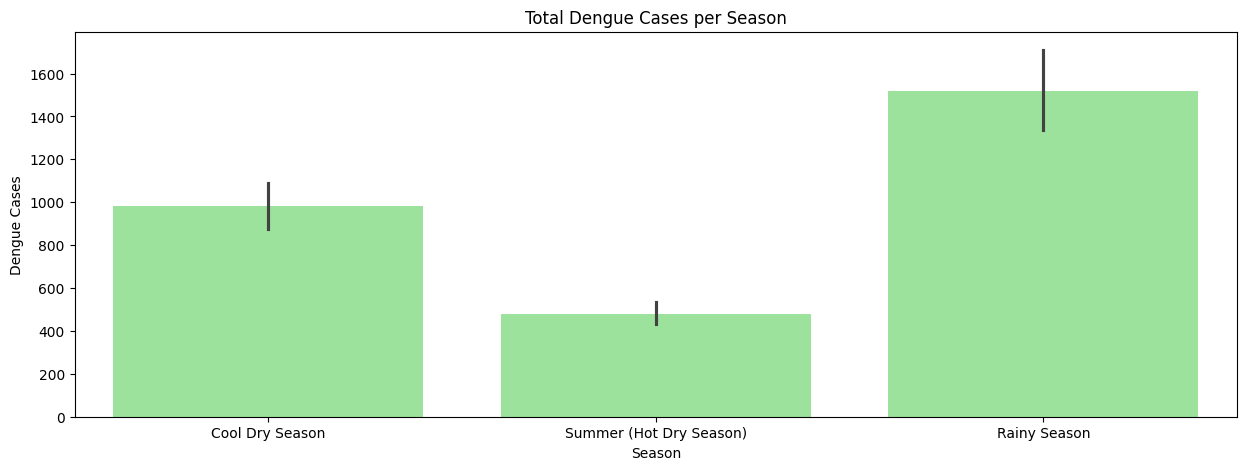

In [61]:
visual1 = sns.barplot(data=data, x='Season', y="Dengue_Cases", color="lightgreen")
plt.title('Total Dengue Cases per Season')
plt.xlabel('Season')
plt.ylabel('Dengue Cases')
plt.gcf().set_size_inches(15,5)
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 4 : </span>The chart shows the Total Dengue Cases per Season. Cases peak during the Rainy Season(~1,500), likely because heavy rainfall creates stagnant water which are ideal breeding grounds for mosquitoes. While cases drop in Summer (~500) due to drier conditions reducing breeding sites. the Cool Dry Season (~1,000) still sees high transmission likely from residual or stored water sources. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 4: REGIONAL TREND OF DENGUE CASES</h2>
<hr>

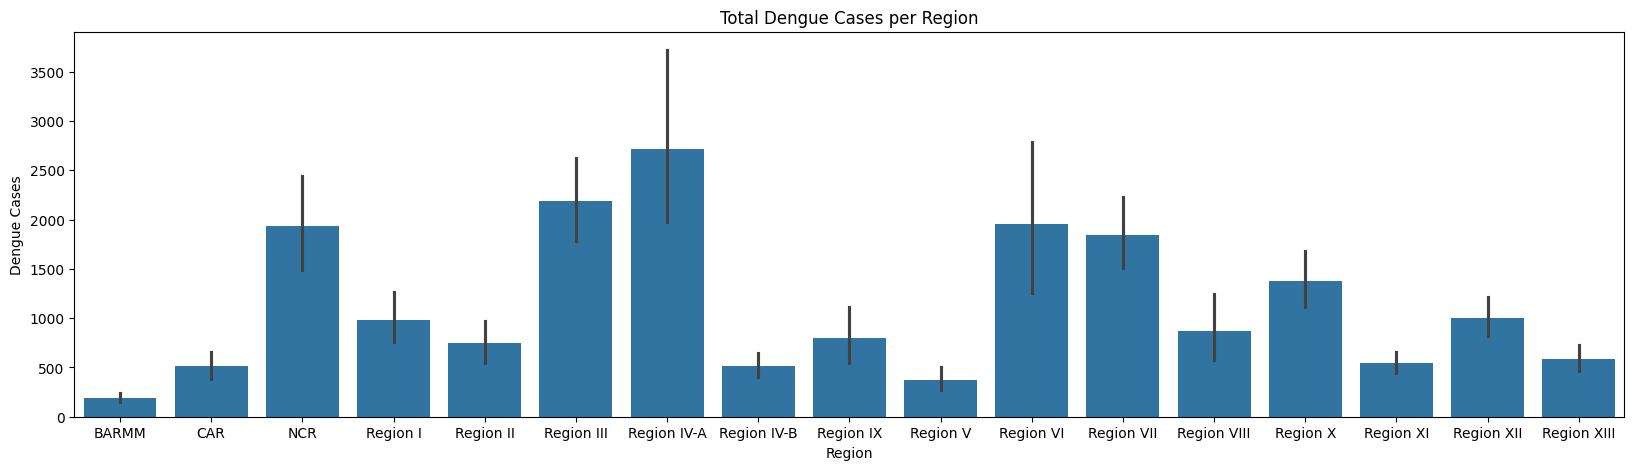

In [97]:
sns.barplot(data=data, x='Region', y="Dengue_Cases")
plt.title('Total Dengue Cases per Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.gcf().set_size_inches(20,5)
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 5 : </span>The chart shows the Total Dengue Cases per Region in the Philippines. It shows that Region IV-A has the highest dengue cases (~2,700), followed by Region III and Region VI(~2,000 each), while BARMM has the least (~200). This pattern is likely because of higher population density and inadequate drainage in regions like IV-A (which includes Metro Manila), which results to an area for mosquitos to spread dengue. In contrast, lower-case regions may have smaller populations, better sanitation, or more effective local control programs. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 5: ISLAND-LEVEL COMPARISON OF DENGUE CASES (LUZON VS VISAYAS VS MINDANAO)</h2>
<hr>

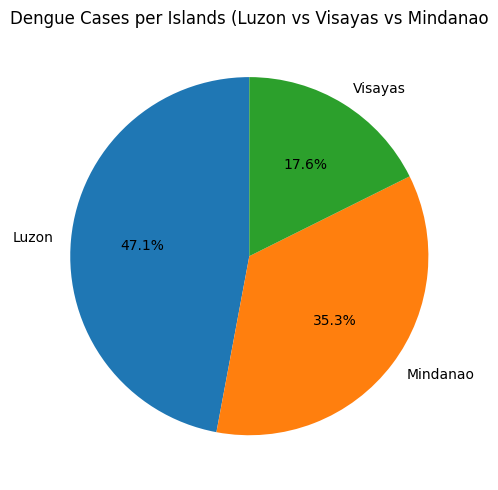

In [72]:
island = data['Island'].value_counts()

plt.pie(island,
        labels = island.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(15,5)
plt.title('Dengue Cases per Islands (Luzon vs Visayas vs Mindanao')
plt.tight_layout()
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 6 : </span>The chart shows distribution of Dengue Cases per Islands of the Philippines. It shows that Luzon has nearly half (47.1%) of all dengue cases, followed by Mindanao (35.3%) and Visayas (17.6%). This indicates that the most popular and urbanized island, Luzon, host the highest transmission due to dense populations, limited waste/water management, and high human-mosquito contact. Mindanao’s significant share may reflect rapid urbanization and climate factors, while Visayas’ lower rate could be due to smaller urban centers or more effective local control.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 6: TOP 5 REGIONS WITH THE HIGHEST DENGUE DEATHS IN THE PHILIPPINES</h2>
<hr>

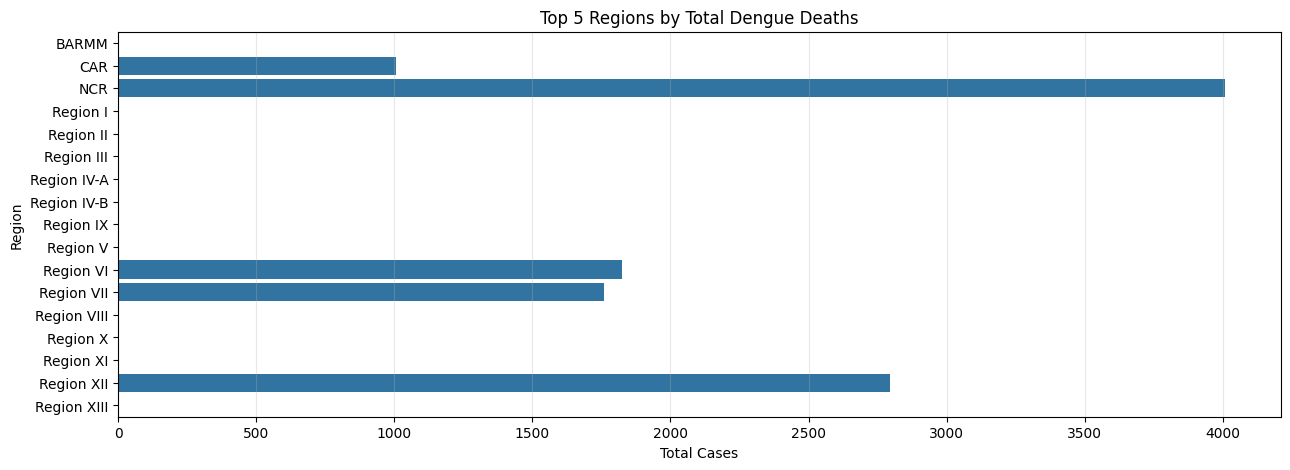

In [88]:
top_regions = data.groupby('Region')['Dengue_Deaths'].sum().nlargest(5).reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data=top_regions, x='Dengue_Deaths', y='Region')
plt.title('Top 5 Regions by Total Dengue Deaths')
plt.xlabel('Total Cases')
plt.grid(axis='x', alpha=0.3)
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 7 : </span>The chart shows the Top 5 Regions with the Highest Dengue Death records in the Philippines. It says that NCR  has the highest dengue deaths (~4,000), followed by Region XII (~2,800), Region VI (~1,850), and Region VII (~1,800), while CAR has the fewest. Populated areas like NCR may experience higher mortality due to overwhelmed hospitals, while rural regions like XII may suffer from delayed care or lack of medical resources. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 7: DENGUE DEATHS DISTRIBUTION OF REGIONS DURING RAINY SEASONS</h2>
<hr>

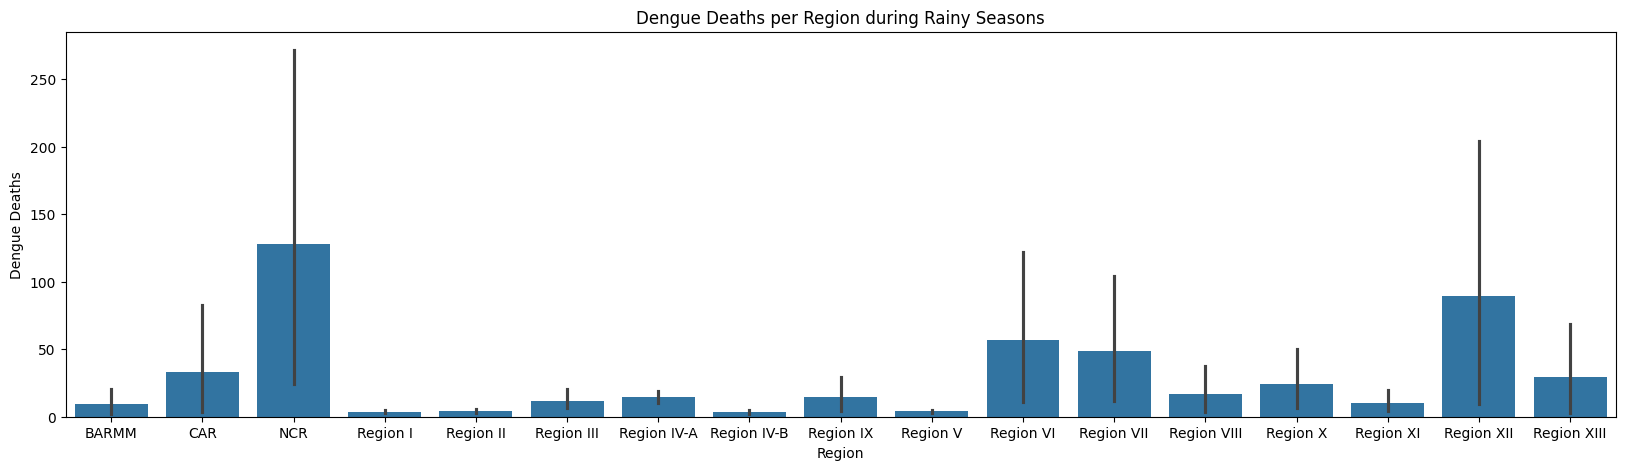

In [103]:
rainy = data[data['Season'] == 'Rainy Season']

sns.barplot(data=rainy, x='Region', y="Dengue_Deaths")
plt.title('Dengue Deaths per Region during Rainy Seasons')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.gcf().set_size_inches(20,5)
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 8 : </span>The chart shows the Dengue Deaths per Region during Rainy Seasons. It shows that NCR has the highest dengue deaths during rainy seasons (~130), followed by Region XII (~90) and Region VI (~60), while most other regions has under 50, likely because NCR’s dense urban population and frequent flooding create ideal mosquito breeding conditions, and its healthcare system may be overwhelmed during peak transmission; Region XII’s high death toll despite lower case numbers may reflect delayed access to medical care in rural or mountainous areas.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 8: MONTHLY TREND OF DENGUE CASES IN THE PHILIPPINES</h2>
<hr>

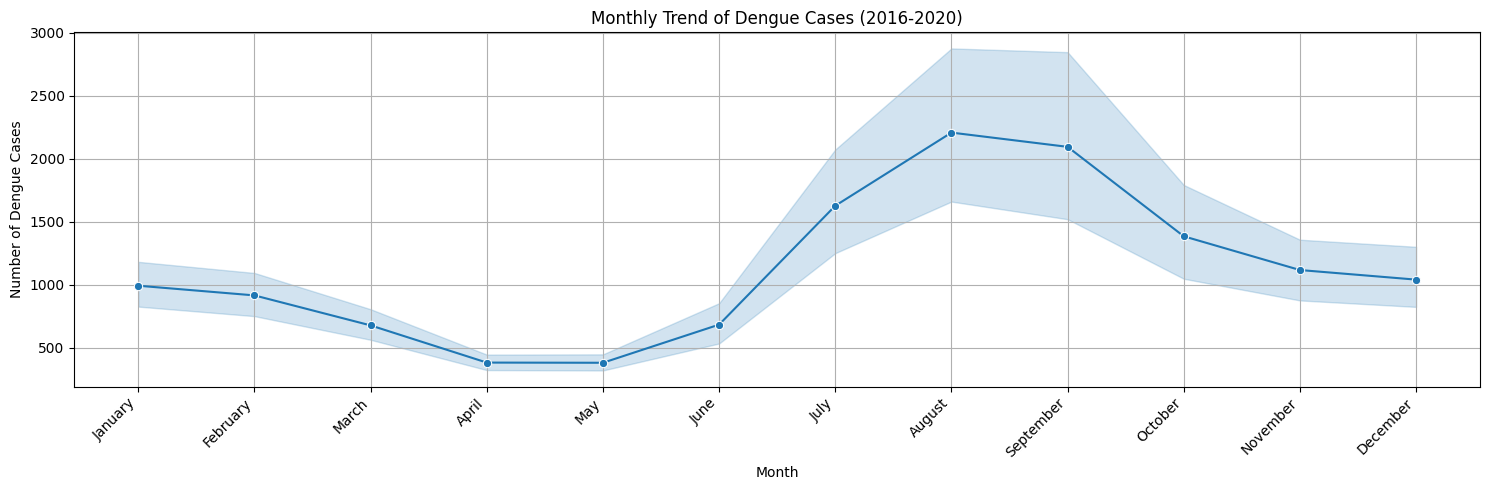

In [126]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)


sns.lineplot( data=data, x='Month', y='Dengue_Cases', marker='o')
plt.gcf().set_size_inches(15, 5)
plt.title('Monthly Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 9 : </span>The chart shows Monthly Trend of Dengue Cases (Overall). Starting low in April (~400), rising sharply from June, peaking in August (~2,900), then gradually declining through year-end. This pattern happens because mosquitoes breed fastest during and after the rainy season. The sharp rise from May to August mirrors typical patterns in tropical regions, making this period the highest risk for outbreaks.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 9: DENGUE MORTALITY RATE PER REGION</h2>
<hr>

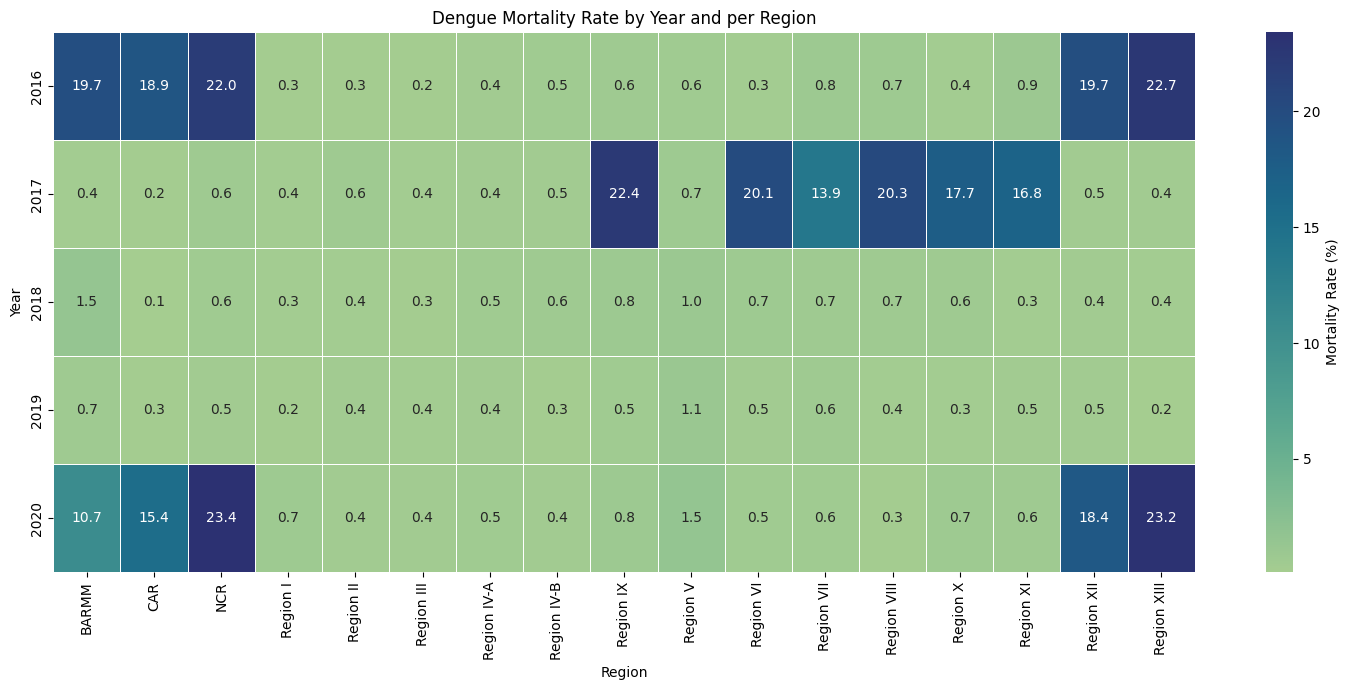

In [116]:
heatmap_data = data.groupby(['Year', 'Region'])['Mortality Rate'].mean().unstack()

plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="crest", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate by Year and per Region')
plt.xlabel('Region')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

<br>
<h4><span style='color:blue;font-weight: bold;'>INSIGHT 10 : </span>The chart shows Dengue Morality Rate per Region over the year 2016-2020. It shows that NCR and Region XIII consistently report the highest dengue mortality rates hitting 22.0% and 22.7% in 2016, and 23.4% and 23.2% in 2020. CAR and Region XII comes after with 18.9% and 19.7% in 2016, and 15.4% and 18.4% in 2020, far exceeding average (typically <1%). Most regions show low mortality (<1%), suggesting better clinical management or milder disease patterns.</h4>
<hr>
<br>

   <h3 style="text-align: right; margin-right: 80px;">Analyst : Jay Cee I. Macaraig</h3>
   <h3 style="text-align: right; margin-right: 80px;">BSIT-3B</h3>